In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("../data/FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [4]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


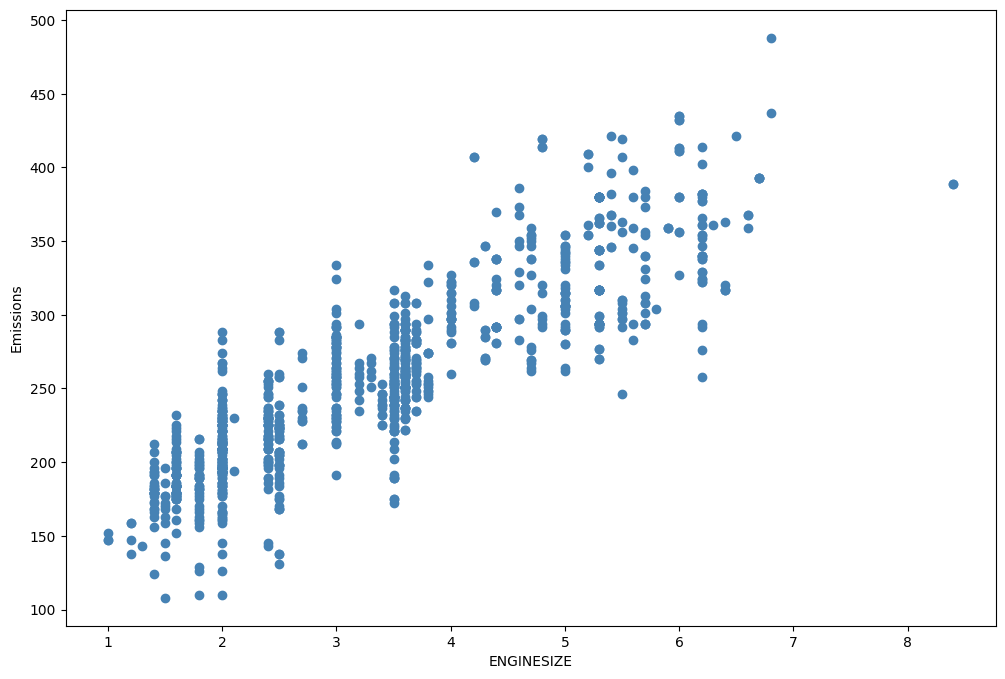

In [5]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.
2nd degree: y = θ0 + θ1 x + θ2 x^2

For example, the original feature set has only one feature: ENGINESIZE If we select the degree of the polynomial to be 2: It generates 3 features: degree=0, degree=1, degree=2

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    2.5   6.25]
 [ 1.    5.4  29.16]
 [ 1.    3.5  12.25]
 ...
 [ 1.    3.6  12.96]
 [ 1.    3.5  12.25]
 [ 1.    3.7  13.69]]


Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation would be turn into: y = θ0 + θ1 x1 + θ2 x2

Polynomial regression is a special case of linear regression, with selection your features.

In [8]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [9]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         48.15779587 -1.19919561]]
Intercept: [111.15100594]


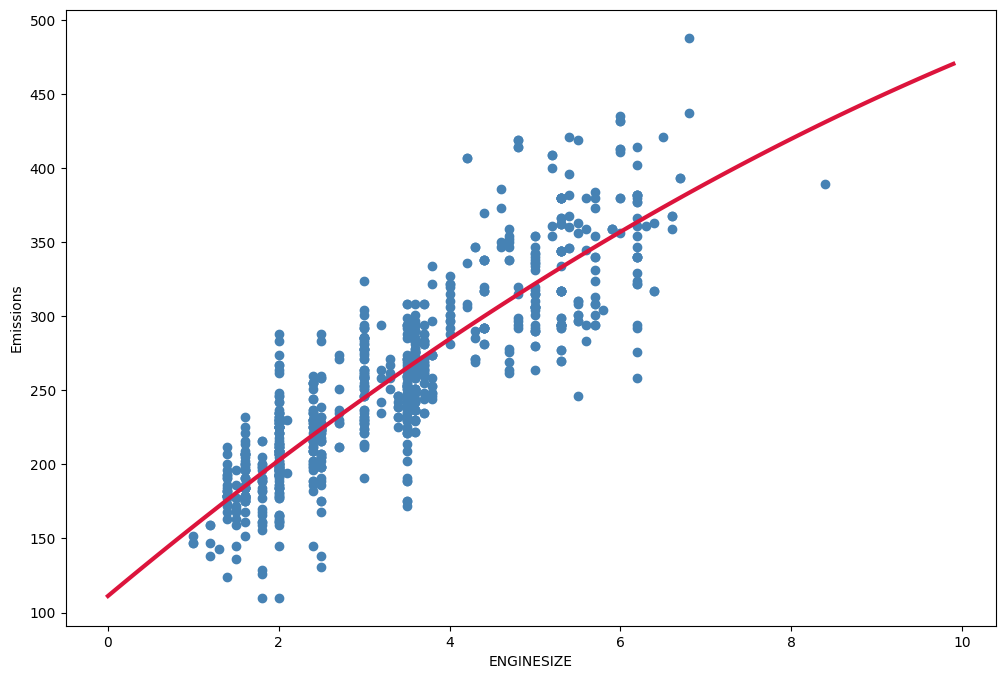

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [11]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[111.15100594 115.95479357 120.73459729 125.4904171  130.222253
 134.93010498 139.61397305 144.27385721 148.90975745 153.52167379
 158.10960621 162.67355472 167.21351932 171.7295     176.22149677
 180.68950964 185.13353858 189.55358362 193.94964475 198.32172196
 202.66981526 206.99392465 211.29405012 215.57019168 219.82234934
 224.05052307 228.2547129  232.43491882 236.59114082 240.72337891
 244.83163309 248.91590335 252.97618971 257.01249215 261.02481068
 265.0131453  268.977496   272.91786279 276.83424567 280.72664464
 284.5950597  288.43949084 292.25993808 296.0564014  299.8288808
 3

# Evaluation

In [13]:
test_x_poly = poly.transform(test_x)
test_y_pred = clf.predict(test_x_poly)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test_y, test_y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(test_y, test_y_pred)
print("MSE:", mse)

rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))
print("RMSE:", rmse)

r2 = r2_score(test_y, test_y_pred)
print("R-squared Score:", r2)

Mean Absolute Error: 22.084336569530134
MSE: 841.0795003283815
RMSE: 29.001370662925254
R-squared Score: 0.7942025964538708
